In [20]:
import matplotlib.pyplot as plt

freq_dict = {}
total_tokens = 0

with open(r"C:\Users\Rani\Desktop\nlp lab\lab1\hindi_words_tokens.txt", "r", encoding="utf-8") as f:
    for line in f:
        words = [w.strip(".,!?;:()[]{}\"'").lower() for w in line.split()]
        for w in words:
            if w:  # ignore empty strings
                total_tokens += 1
                if w in freq_dict:
                    freq_dict[w] += 1
                else:
                    freq_dict[w] = 1

# Step 3: Plot top 100 frequent words
sorted_freq = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:100]
words, counts = zip(*sorted_freq)



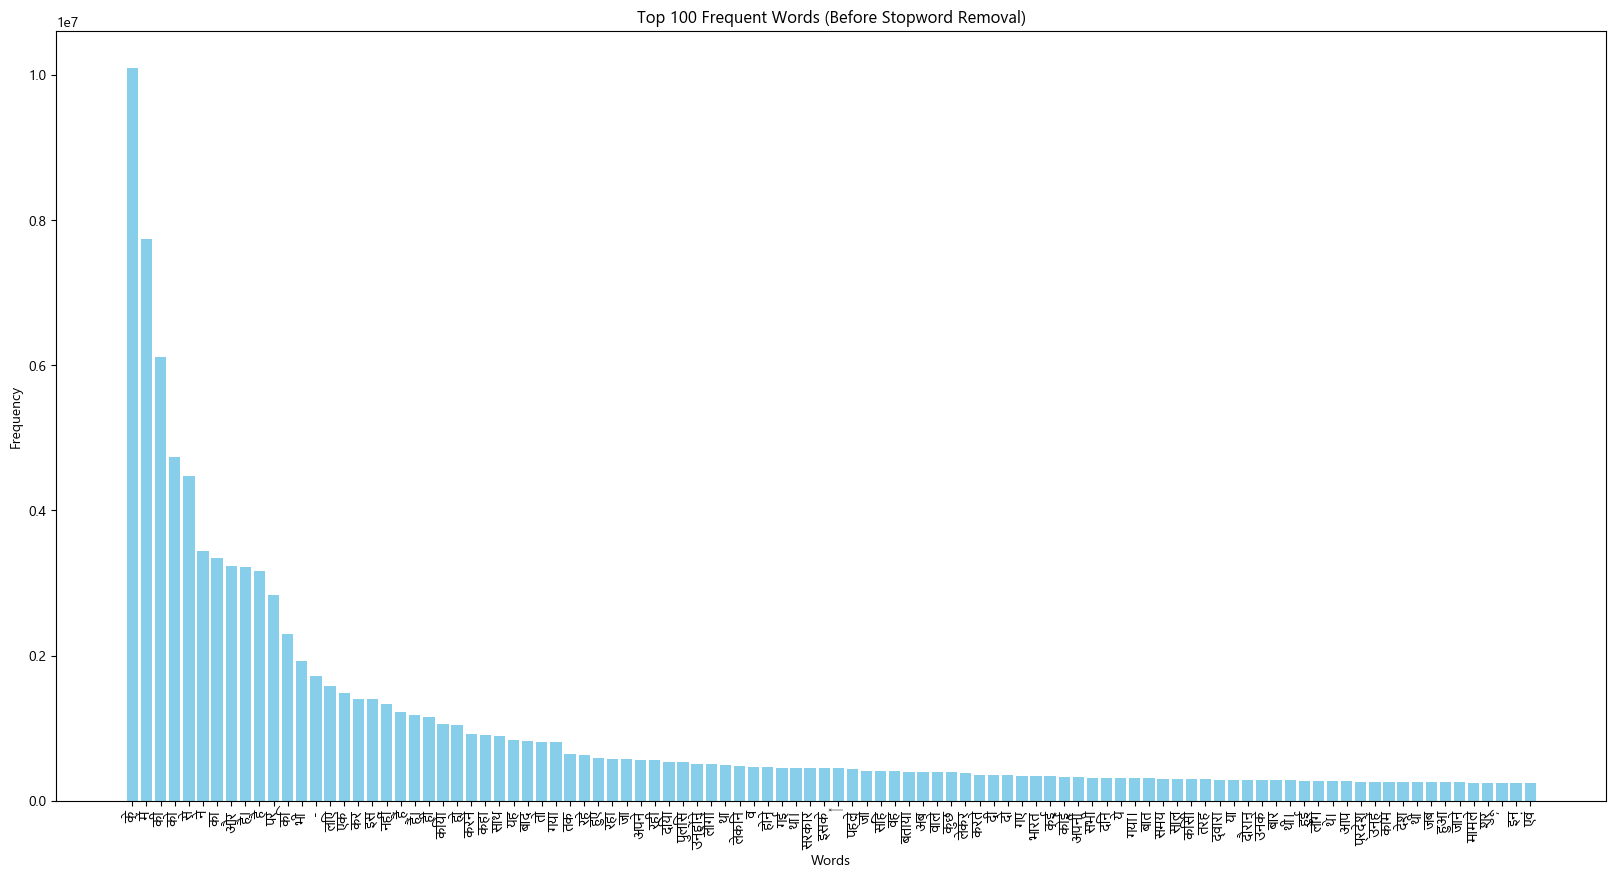

In [21]:
from matplotlib import rcParams

# Set font that supports Devanagari
rcParams['font.family'] = 'Nirmala UI'
plt.figure(figsize=(20,10))
plt.bar(words, counts, color="skyblue")
plt.xticks(range(0, 100, 1),rotation=90)  
plt.title("Top 100 Frequent Words (Before Stopword Removal)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


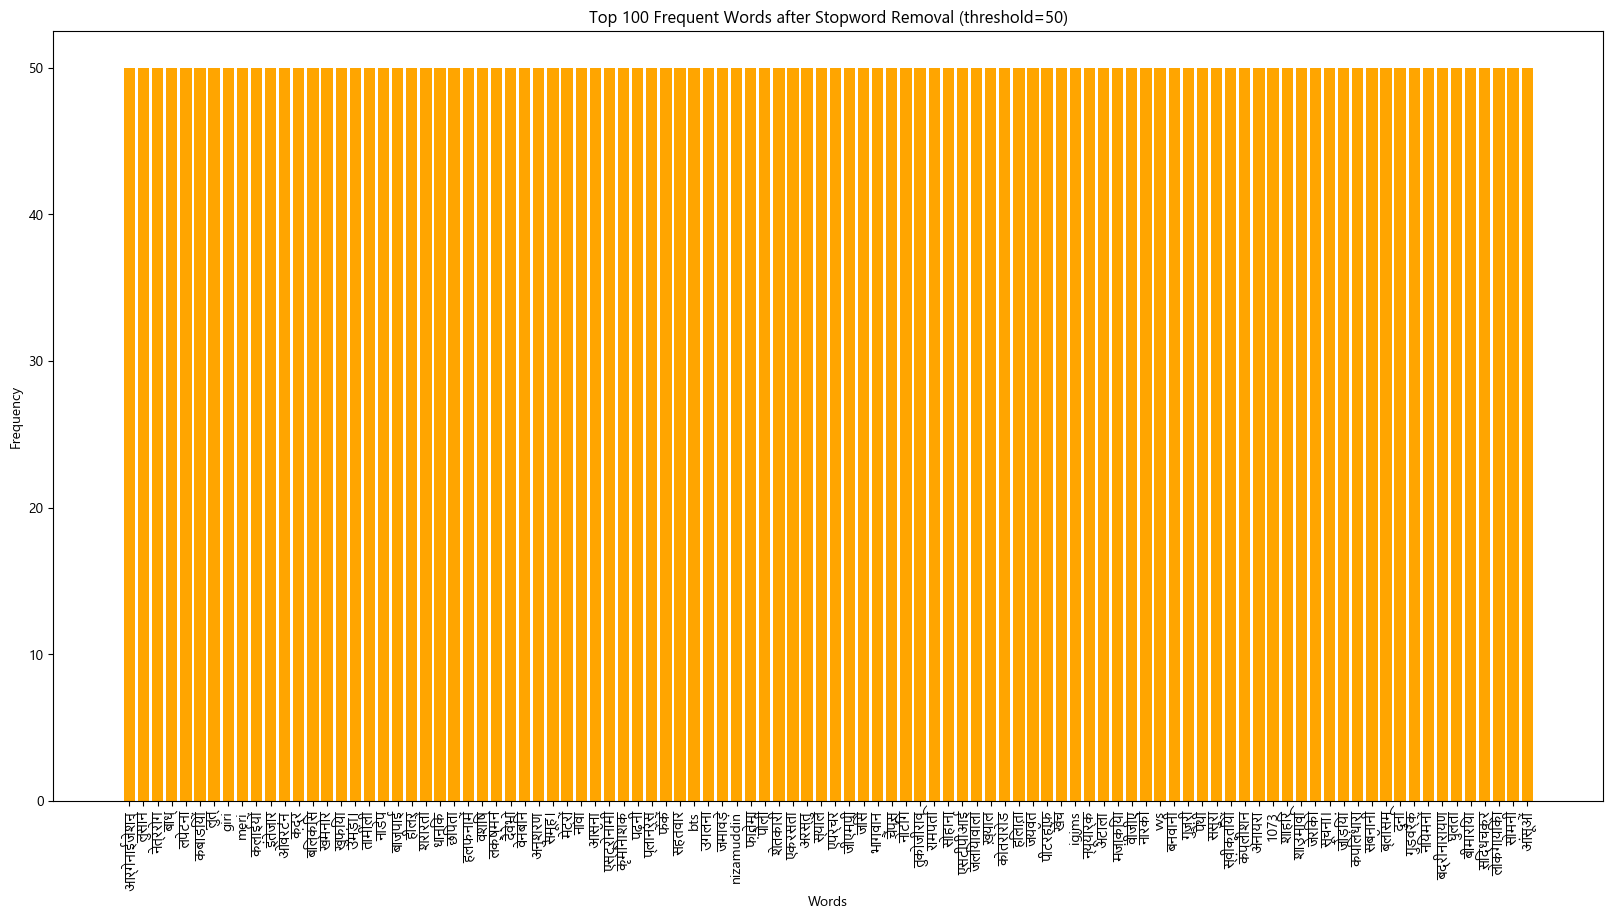

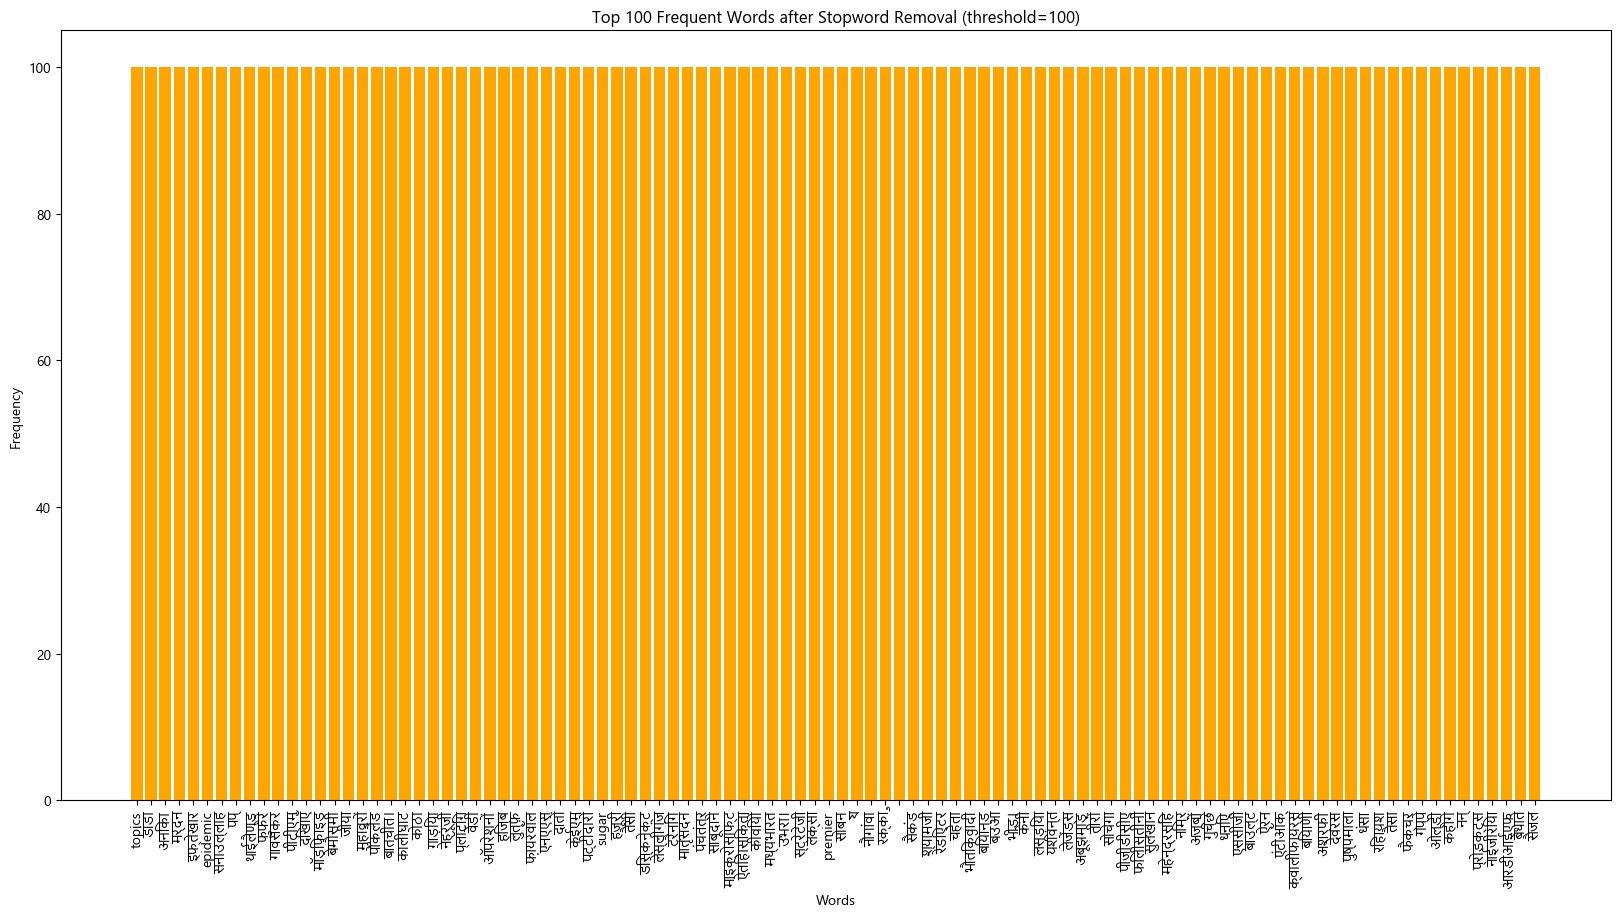

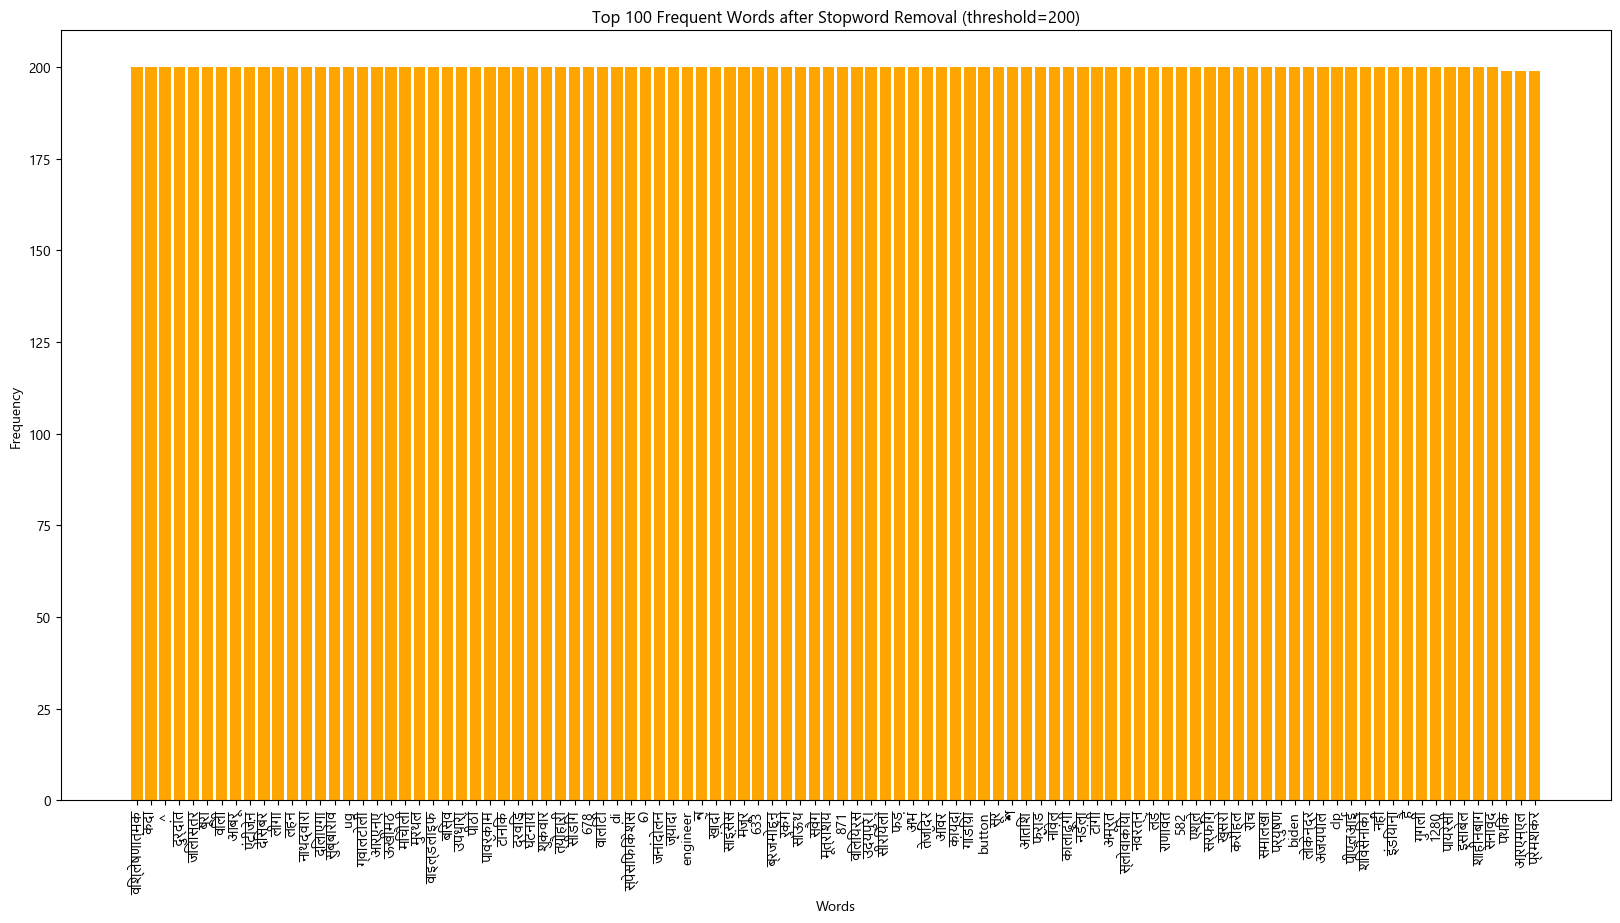

In [19]:

# Step 4: Identify stopwords via frequency threshold
def remove_stopwords(freq_dist, threshold):
    """Remove words with frequency above threshold"""
    return {word: freq for word, freq in freq_dist.items() if freq <= threshold}

# Try 3 thresholds
thresholds = [50, 100, 200]

for t in thresholds:
    filtered = remove_stopwords(freq_dist, t)
    sorted_filtered = sorted(filtered.items(), key=lambda x: x[1], reverse=True)[:100]

    if not sorted_filtered:
        continue

    words_f, counts_f = zip(*sorted_filtered)

    plt.figure(figsize=(20,10))
    plt.bar(words_f, counts_f, color="orange")
    plt.xticks(range(0, 100, 1),rotation=90)   # show every 5th label
    plt.title(f"Top 100 Frequent Words after Stopword Removal (threshold={t})")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()
